In [124]:
import numpy as np
from tensorflow import keras
from tensorflow.keras.models import load_model
from tensorflow.keras.utils import load_img,img_to_array
from tensorflow.keras.preprocessing import image
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
from keras.models import Sequential 
from keras.utils import np_utils
from keras.layers import Dense,Activation,Dropout,LSTM,BatchNormalization
from keras.layers import Flatten
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.utils import to_categorical
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D


In [125]:
data_train='/content/drive/MyDrive/Colab Notebooks/10MONANVIETNAM/TRAIN'
data_validation='/content/drive/MyDrive/Colab Notebooks/10MONANVIETNAM/TEST'
train=ImageDataGenerator(rescale=1/255)
validation=ImageDataGenerator(rescale=1/255)

In [126]:
traindata=train.flow_from_directory(data_train,
                                    target_size=(150,150),
                                    batch_size=10,
                                    class_mode='categorical',)
validationdata=validation.flow_from_directory(data_validation,
                                              target_size=(150,150),
                                              batch_size=10,
                                              class_mode='categorical',)

Found 70 images belonging to 10 classes.
Found 30 images belonging to 10 classes.


In [127]:
print(traindata.class_indices)
print(validationdata.class_indices)

{'BANHMI': 0, 'BANHXEO': 1, 'BUNRIEU': 2, 'CALOCNUONG': 3, 'CANHCHUA': 4, 'CHANGASATAC': 5, 'CHUOTNUONG': 6, 'COMSUON': 7, 'PHO': 8, 'VITKHOGUNG': 9}
{'BANHMI(4)': 0, 'BANHXEO(10)': 1, 'BUNRIEU(3)': 2, 'CALOCNUONG(9)': 3, 'CANHCHUA(5)': 4, 'CHANGASATAC(6)': 5, 'CHUOTNUONG(7)': 6, 'COMSUON(1)': 7, 'PHO(2)': 8, 'VITKHOGUNG(8)': 9}


In [128]:

model=Sequential()
model.add(Conv2D(32,(3,3),activation='relu',input_shape=(150,150,3)))
model.add(MaxPooling2D((2,2)))
model.add(Conv2D(64,(3,3),activation='relu'))
model.add(MaxPooling2D((2,2)))
model.add(Conv2D(128,(3,3),activation='relu'))
model.add(Flatten())
model.add(Dense(128,activation='relu'))
model.add(Dense(10,activation='softmax'))

In [129]:
model.compile(loss='categorical_crossentropy',optimizer='rmsprop',metrics=['accuracy'])
history=model.fit(traindata,batch_size=10,epochs=20,verbose=1,validation_data=validationdata)

Epoch 1/20
7/7 [==============================] - 6s 757ms/step - loss: 5.4947 - accuracy: 0.0571 - val_loss: 2.3196 - val_accuracy: 0.0667
Epoch 2/20
7/7 [==============================] - 5s 720ms/step - loss: 2.6207 - accuracy: 0.2429 - val_loss: 2.3701 - val_accuracy: 0.1000
Epoch 3/20
7/7 [==============================] - 5s 721ms/step - loss: 2.2717 - accuracy: 0.2000 - val_loss: 2.2852 - val_accuracy: 0.1333
Epoch 4/20
7/7 [==============================] - 5s 725ms/step - loss: 1.9132 - accuracy: 0.4429 - val_loss: 2.2873 - val_accuracy: 0.1333
Epoch 5/20
7/7 [==============================] - 5s 724ms/step - loss: 1.2726 - accuracy: 0.6286 - val_loss: 2.3492 - val_accuracy: 0.2000
Epoch 6/20
7/7 [==============================] - 5s 713ms/step - loss: 0.5914 - accuracy: 0.8571 - val_loss: 2.8868 - val_accuracy: 0.1333
Epoch 7/20
7/7 [==============================] - 5s 722ms/step - loss: 0.1361 - accuracy: 0.9429 - val_loss: 2.2969 - val_accuracy: 0.3333
Epoch 8/20
7/7 [====

array([3])

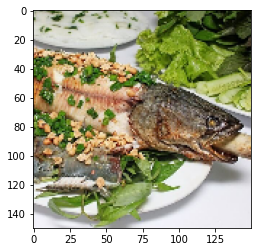

In [130]:
img=load_img('/content/drive/MyDrive/Colab Notebooks/10MONANVIETNAM/TRAIN/CALOCNUONG/ca-loc-nuong-cuon-banh-trang-1.jpg',target_size=(150,150))
plt.imshow(img)
img=img_to_array(img)
img=img.reshape(1,150,150,3)
img=img.astype('float32')
img=img/255
np.argmax(model.predict(img),axis=-1)

array([0])

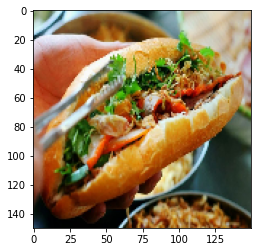

In [131]:
img=load_img('/content/drive/MyDrive/Colab Notebooks/10MONANVIETNAM/TRAIN/BANHMI/banh-mi-viet-nam.jpg',target_size=(150,150))
plt.imshow(img)
img=img_to_array(img)
img=img.reshape(1,150,150,3)
img=img.astype('float32')
img=img/255
np.argmax(model.predict(img),axis=-1)

array([6])

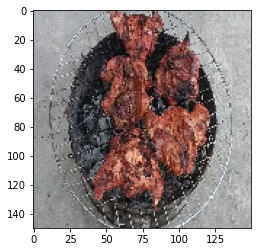

In [133]:
img=load_img('/content/chuột-nướng-recipe-main-photo.jpg',target_size=(150,150))
plt.imshow(img)
img=img_to_array(img)
img=img.reshape(1,150,150,3)
img=img.astype('float32')
img=img/255
np.argmax(model.predict(img),axis=-1)

In [134]:
model.save('cnn_10monanvietnam.h5')